Import Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium.plugins import HeatMap
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


Data preprocessing


In [2]:
# Define the file path
file_path = '/content/drive/MyDrive/task_1_final/Job History Export_New.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,Pickup Date,Customer Name,Customer Email,Customer Notes,Address,Latitude,Longitude,Contact Name,Contact Phone,Driver,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,10/2/2018 9:00,Emerge180,lchristopherson@emerge180.com,NaN,"13902 N Dale Mabry Hwy Suite 229, Tampa",28.072789,-82.507805,Lee Christopherson,NaN,Unassigned Jobs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/2/2018 10:00,Deliver Media,Mike.rumore@delivermedia.com,NaN,"3903 Northdale Blvd #280Tampa, Tampa, FL 33624",28.095117,-82.507505,Mike Rumore,8632791383,Unassigned Jobs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/2/2018 10:30,Greatlakes Advisors,rcook@greatlakesadvisors.com,NaN,"7650 West Courtney Campbell, Tampa, FL",27.966524,-82.567540,Randy Cook,NaN,Unassigned Jobs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/2/2018 9:00,TouchPoint Medical - Douglas,mmendez@touchpointmed.com,NaN,"114 Douglas Rd E\r\nOldsmar, FL 34677",28.041956,-82.663466,Jim Hill,NaN,Devin Edwards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10/2/2018 11:00,Disability Rights Florida,zoer@disabilityrightsflorida.org,NaN,"1000 N Ashley Dr., Suite 640\r\nTampa, FL",27.952094,-82.462287,Zoe Reeber,850-488-9071 ext 9763,Unassigned Jobs,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.nunique()

Pickup Date           14157
Customer Name         14865
Customer Email        12938
Customer Notes          744
Address               17750
Latitude              13563
Longitude             12981
Contact Name          14519
Contact Phone         13985
Driver                   26
Warehouse Location        3
Job Description       24060
Job #                 27945
Job Category              4
Unnamed: 14               5
Unnamed: 15               5
Unnamed: 16               5
Unnamed: 17               5
Unnamed: 18               5
Unnamed: 19               5
Unnamed: 20               4
Unnamed: 21               1
Unnamed: 22               5
Unnamed: 23               5
Unnamed: 24               2
dtype: int64

In [4]:
# Define the list of columns to drop
columns_to_drop = ['Unnamed: 14', 'Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24']  # Replace with your column names

# Drop the specified columns
df = df.drop(columns=columns_to_drop)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


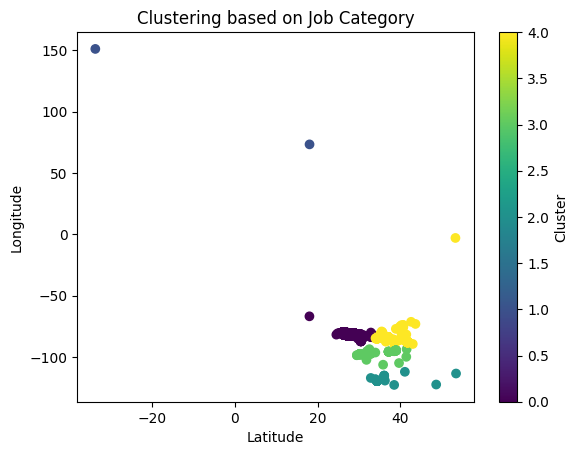

In [5]:
# Impute missing values with the mean for 'Latitude' and 'Longitude' columns
imputer = SimpleImputer(strategy='mean')
df[['Latitude', 'Longitude']] = imputer.fit_transform(df[['Latitude', 'Longitude']])

# Apply K-means clustering based on the unique values in the "Job Category" column
kmeans = KMeans(n_clusters=len(df['Job Category'].unique()), random_state=0)
kmeans.fit(df[['Latitude', 'Longitude']])

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(df['Latitude'], df['Longitude'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering based on Job Category')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()

In [6]:
df['Job Category'].nunique()
print(df['Job Category'].unique())

['COMMERCIAL' 'RESIDENTIAL' nan 'DROP OFF'
 'Please also send Cert to Chris Bashaw @ cbashaw@vptitle.net']


<ipython-input-7-743bef04104c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Color'] = df_filtered['Job Category'].map(category_colors)
<ipython-input-7-743bef04104c>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df_filtered['Latitude'], df_filtered['Longitude'], c=df_filtered['Color'], cmap='viridis')


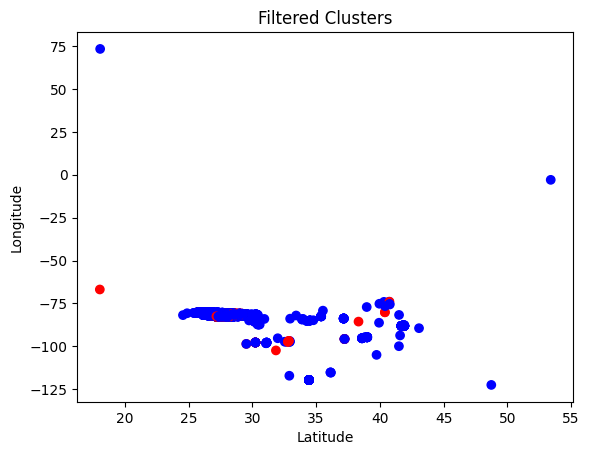

In [7]:
# Define the cluster labels to keep
clusters_to_keep = ['COMMERCIAL', 'RESIDENTIAL']

# Filter the DataFrame to keep only the specified clusters
df_filtered = df[df['Job Category'].isin(clusters_to_keep)]

# Define a mapping of categories to colors
category_colors = {'COMMERCIAL': 'blue', 'RESIDENTIAL': 'red'}

# Map the 'Job Category' column to colors
df_filtered['Color'] = df_filtered['Job Category'].map(category_colors)

# Visualize the filtered clusters with colors based on job category
plt.scatter(df_filtered['Latitude'], df_filtered['Longitude'], c=df_filtered['Color'], cmap='viridis')
plt.title('Filtered Clusters')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


In [8]:
df_filtered.head()

,Pickup Date,Customer Name,Customer Email,Customer Notes,Address,Latitude,Longitude,Contact Name,Contact Phone,Driver,Warehouse Location,Job Description,Job #,Job Category,Cluster,Color
0,10/2/2018 9:00,Emerge180,lchristopherson@emerge180.com,NaN,"13902 N Dale Mabry Hwy Suite 229, Tampa",28.072789,-82.507805,Lee Christopherson,NaN,Unassigned Jobs,NaN,18 CPU's,286,COMMERCIAL,0,blue
1,10/2/2018 10:00,Deliver Media,Mike.rumore@delivermedia.com,NaN,"3903 Northdale Blvd #280Tampa, Tampa, FL 33624",28.095117,-82.507505,Mike Rumore,8632791383,Unassigned Jobs,NaN,15 desktops,289,COMMERCIAL,0,blue
2,10/2/2018 10:30,Greatlakes Advisors,rcook@greatlakesadvisors.com,NaN,"7650 West Courtney Campbell, Tampa, FL",27.966524,-82.567540,Randy Cook,NaN,Unassigned Jobs,NaN,6 Desktops - 1 server - one monitor - external...,290,COMMERCIAL,0,blue
3,10/2/2018 9:00,TouchPoint Medical - Douglas,mmendez@touchpointmed.com,NaN,"114 Douglas Rd E\r\nOldsmar, FL 34677",28.041956,-82.663466,Jim Hill,NaN,Devin Edwards,NaN,Misc,291,COMMERCIAL,0,blue
4,10/2/2018 11:00,Disability Rights Florida,zoer@disabilityrightsflorida.org,NaN,"1000 N Ashley Dr., Suite 640\r\nTampa, FL",27.952094,-82.462287,Zoe Reeber,850-488-9071 ext 9763,Unassigned Jobs,NaN,Chairs; television; file cabinet,292,COMMERCIAL,0,blue


In [9]:
# Filter the DataFrame to include only Commercial customers
commercial_df = df_filtered[df_filtered['Job Category'] == 'COMMERCIAL']

# Define categories for expensive and moderate items
expensive_items = ['xerox','battery','CPU','missle','LCD','Microwave','Scanner','hardrives','HDD','mac','Display','Dell','Batteries cables','speakers','phones modem']  # Example expensive items
moderate_items = ['Desktop', 'VCR/DVD', 'Electronics','Phones','Computers','Batter backups','Printers','Keyboards','Misc items','Monitors','Television','UPS','Notebook','Garmin','laptop','hard drive','copier']  # Example moderate items

# Function to categorize job descriptions
def categorize_job_description(description):
    if isinstance(description, str):  # Check if description is a string and not NaN
        if any(item in description for item in expensive_items):
            return 'Expensive'
        elif any(item in description for item in moderate_items):
            return 'Moderate'
    return 'Other'

# Apply categorization to job descriptions
commercial_df['Item Category'] = commercial_df['Job Description'].apply(categorize_job_description)

# Group by location and item category, and count occurrences
location_item_count = commercial_df.groupby(['Address', 'Item Category']).size().reset_index(name='Count')

# Sort by count in descending order to get top locations
top_locations = location_item_count.sort_values(by='Count', ascending=False)

# Print the top locations with expensive and moderate items for Commercial Customers
print("Top Locations with Expensive and Moderate Items for Commercial Customers:")
print(top_locations)


Top Locations with Expensive and Moderate Items for Commercial Customers:
                                                 Address Item Category  Count
1671           13000 Bruce B Downs Blvd, Tampa, FL 33612         Other    170
3604       2005 N Orange Ave, Ste 101, Orlando, FL 32804         Other    118
1855        1324 Lakeland Hills Blvd, Lakeland, FL 33805         Other     89
3013             1755 Northgate Blvd, Sarasota, FL 34231         Other     67
8868              5630 E Powhatan Ave\r\nTampa, FL 33610         Other     66
...                                                  ...           ...    ...
3               1 ASI Way North, St Petersburg, FL 33702     Expensive      1
11783                             Tampa General Hospital         Other      1
11784                                     Tampa, Florida         Other      1
11788  Tankerway Gate - Bldg 1012\r\n1012 NW Boundry ...      Moderate      1
11790  Tankerway Gate - Bldg 1012\r\n1012 NW Boundry ...         Oth

<ipython-input-9-d29c44f58cf1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_df['Item Category'] = commercial_df['Job Description'].apply(categorize_job_description)


Top Locations with Expensive and Moderate Items for Commercial Customers

In [10]:
# Create a map centered at the mean latitude and longitude of the locations
map_center = [commercial_df['Latitude'].mean(), commercial_df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Generate heatmap data from the DataFrame
heatmap_data = commercial_df[['Latitude', 'Longitude']].values.tolist()

# Add heatmap layer to the map
HeatMap(heatmap_data).add_to(m)

# Display the map
m.save('commercial_heatmap.html')  # Save the map as an HTML file
m


TOP 20 Countries for Expensive and Moderate Items

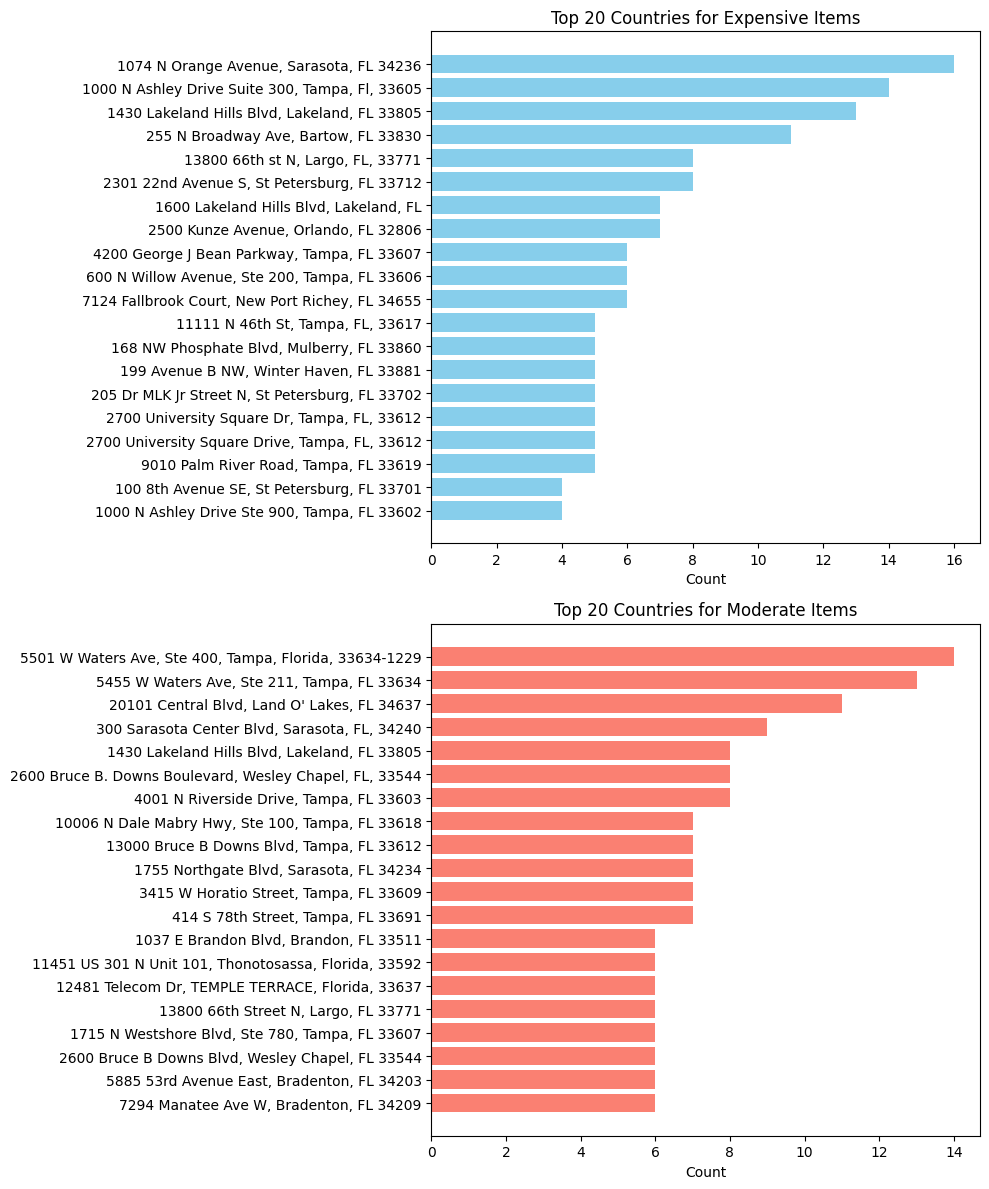

In [11]:
# Group by address and item category, and count occurrences
address_item_count = commercial_df.groupby(['Address', 'Item Category']).size().reset_index(name='Count')

# Filter for only expensive and moderate items
expensive_addresses = address_item_count[address_item_count['Item Category'] == 'Expensive']
moderate_addresses = address_item_count[address_item_count['Item Category'] == 'Moderate']

# Get the top 20 countries for expensive and moderate items
top_expensive_countries = expensive_addresses.groupby('Address')['Count'].sum().nlargest(20)
top_moderate_countries = moderate_addresses.groupby('Address')['Count'].sum().nlargest(20)

# Plot top 20 countries for expensive and moderate items
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot top 20 countries for expensive items
axs[0].barh(top_expensive_countries.index[::-1], top_expensive_countries.values[::-1], color='skyblue')
axs[0].set_title('Top 20 Countries for Expensive Items')
axs[0].set_xlabel('Count')

# Plot top 20 countries for moderate items
axs[1].barh(top_moderate_countries.index[::-1], top_moderate_countries.values[::-1], color='salmon')
axs[1].set_title('Top 20 Countries for Moderate Items')
axs[1].set_xlabel('Count')

plt.tight_layout()
plt.show()


Total Commercial Customers, Repeated Commercial Customers and Business Return Rate

In [12]:
# Calculate the total number of unique commercial customers
total_customers = commercial_df['Customer Name'].nunique()

# Calculate the number of repeat commercial customers
repeat_customers = commercial_df['Customer Name'].value_counts()[commercial_df['Customer Name'].value_counts() > 1].count()

# Calculate the business return rate
return_rate = repeat_customers / total_customers

print(f"Total Commercial Customers: {total_customers}")
print(f"Repeat Commercial Customers: {repeat_customers}")
print(f"Business Return Rate: {return_rate:.2%}")


Total Commercial Customers: 7875
Repeat Commercial Customers: 2628
Business Return Rate: 33.37%


Business Return Rate over the years

<ipython-input-13-50ff0aa03517>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])
<ipython-input-13-50ff0aa03517>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_df['Year'] = commercial_df['Pickup Date'].dt.year


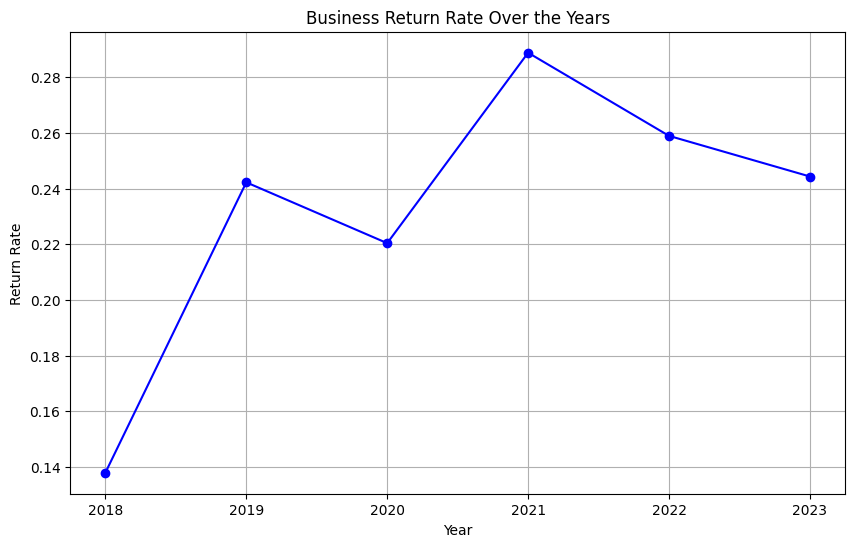

In [13]:
# Convert 'Pickup Date' to datetime and extract the year
commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])
commercial_df['Year'] = commercial_df['Pickup Date'].dt.year

# Function to calculate return rate for a given year
def calculate_return_rate(year_df):
    total_customers = year_df['Customer Name'].nunique()
    repeat_customers = year_df['Customer Name'].value_counts()[year_df['Customer Name'].value_counts() > 1].count()
    return repeat_customers / total_customers if total_customers > 0 else 0

# Group by year and calculate return rate for each year
return_rate_by_year = commercial_df.groupby('Year').apply(calculate_return_rate).reset_index(name='Return Rate')

# Plot the return rate over the years
plt.figure(figsize=(10, 6))
plt.plot(return_rate_by_year['Year'], return_rate_by_year['Return Rate'], marker='o', linestyle='-', color='b')
plt.title('Business Return Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Return Rate')
plt.grid(True)
plt.show()


Top Cities with Repeating Customers

In [14]:
# Convert 'Pickup Date' to datetime if not already done
commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])

# Identify repeat customers
repeat_customers = commercial_df['Customer Name'].value_counts()[commercial_df['Customer Name'].value_counts() > 1].index

# Filter the DataFrame to include only repeat customers
repeat_customers_df = commercial_df[commercial_df['Customer Name'].isin(repeat_customers)]

# Extract the city from the address
repeat_customers_df['City'] = repeat_customers_df['Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)

# Count occurrences of repeat customers by city
top_cities = repeat_customers_df['City'].value_counts().head(20)

# Print the top cities with repeat customers
print("Top cities with the highest number of repeat customers:")
print(top_cities)


Top cities with the highest number of repeat customers:
City
Tampa                2904
Lakeland              787
Sarasota              778
Orlando               404
Clearwater            377
Bradenton             314
St Petersburg         285
Florida               238
FL                    153
Winter Haven          147
Ste 101               142
Largo                 133
Lutz                  131
Fort Myers            110
St. Petersburg        102
Ste 200                97
Ste 100                96
Brandon                94
Bartow                 88
Altamonte Springs      88
Name: count, dtype: int64


<ipython-input-14-18376783c8d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])
<ipython-input-14-18376783c8d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_df['City'] = repeat_customers_df['Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)


<ipython-input-15-e97bd2179414>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])
<ipython-input-15-e97bd2179414>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_df['City'] = repeat_customers_df['Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)


Top cities with the highest number of repeat customers:
City
Tampa                2904
Lakeland              787
Sarasota              778
Orlando               404
Clearwater            377
Bradenton             314
St Petersburg         285
Florida               238
FL                    153
Winter Haven          147
Ste 101               142
Largo                 133
Lutz                  131
Fort Myers            110
St. Petersburg        102
Ste 200                97
Ste 100                96
Brandon                94
Bartow                 88
Altamonte Springs      88
Name: count, dtype: int64


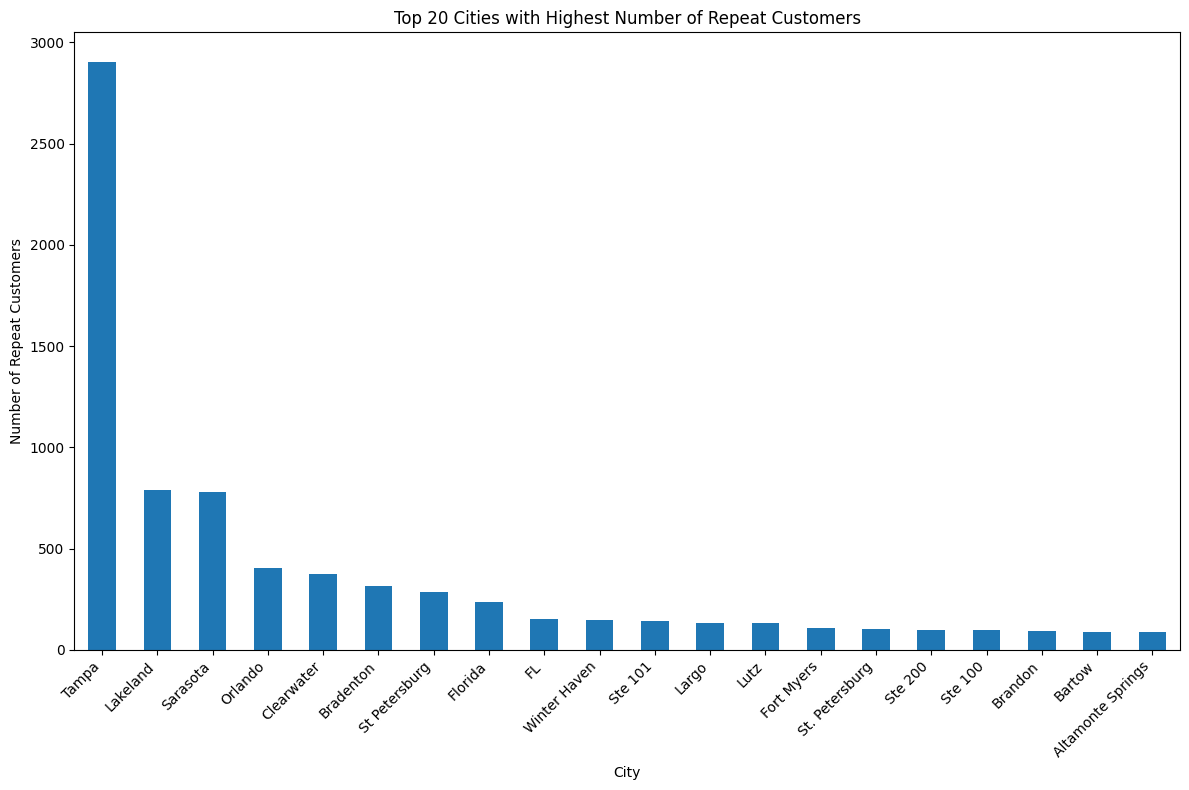

In [15]:
# Convert 'Pickup Date' to datetime if not already done
commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])

# Identify repeat customers
repeat_customers = commercial_df['Customer Name'].value_counts()[commercial_df['Customer Name'].value_counts() > 1].index

# Filter the DataFrame to include only repeat customers
repeat_customers_df = commercial_df[commercial_df['Customer Name'].isin(repeat_customers)]

# Extract the city from the address
repeat_customers_df['City'] = repeat_customers_df['Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)

# Count occurrences of repeat customers by city
top_cities = repeat_customers_df['City'].value_counts().head(20)

# Print the top cities with repeat customers
print("Top cities with the highest number of repeat customers:")
print(top_cities)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
top_cities.plot(kind='bar')
plt.title('Top 20 Cities with Highest Number of Repeat Customers')
plt.xlabel('City')
plt.ylabel('Number of Repeat Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-16-2ddcb63d079a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])


Top customers with the highest number of repeat orders:
Customer Name
James A. Haley Veterans Hospital             181
AHCFSORL_Orlando Warehouse (AdventHealth)    163
LRH B-101                                    105
Site Tech Services                            88
Vitil Solutions                               87
Vitil Solutions--                             64
AHCSASC_Solutions Center (AdventHealth)       60
AMN Healthcare (Stratus Video)                56
Sarasota Technology Users Group               55
MacDill AFB - SoCom                           54
Advanced Systems ( Catalina)                  52
Techmate                                      52
Dental Care Alliance                          52
MacDill AFB - Six Nations Refuse              50
The Spring - Donation Center                  49
Vitil Solutions - Tyson                       48
CCS Medical                                   47
Hillsborough Community College (HCC)          45
Kimball Electronics                           45

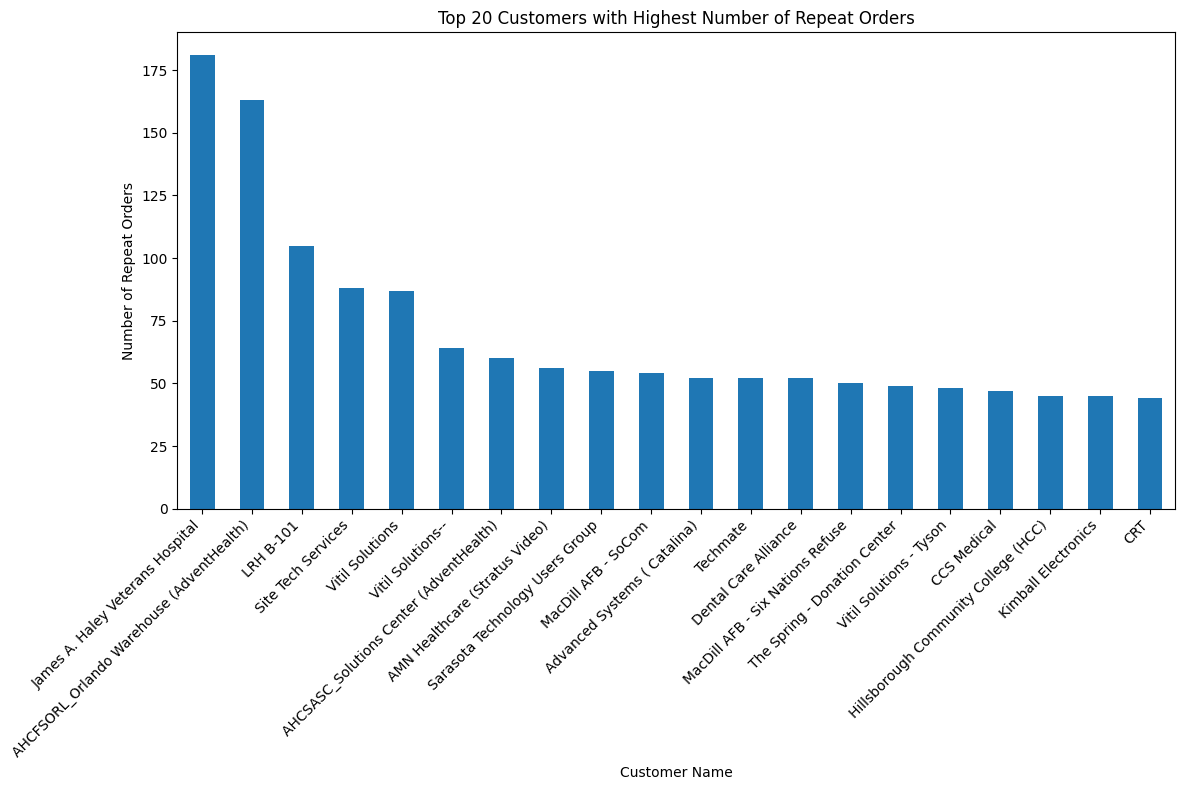

In [16]:
# Convert 'Pickup Date' to datetime if not already done
commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])

# Identify repeat customers
repeat_customers = commercial_df['Customer Name'].value_counts()[commercial_df['Customer Name'].value_counts() > 1]

# Get the top repeating customers
top_customers = repeat_customers.head(20)

# Print the top customers with repeat orders
print("Top customers with the highest number of repeat orders:")
print(top_customers)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
top_customers.plot(kind='bar')
plt.title('Top 20 Customers with Highest Number of Repeat Orders')
plt.xlabel('Customer Name')
plt.ylabel('Number of Repeat Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Frequency of Service Usage by Top 4 Repeating Customers

<ipython-input-17-440fa4caa49c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])


Top 4 customers with the highest number of repeat orders:
Customer Name
James A. Haley Veterans Hospital             181
AHCFSORL_Orlando Warehouse (AdventHealth)    163
LRH B-101                                    105
Site Tech Services                            88
Name: count, dtype: int64


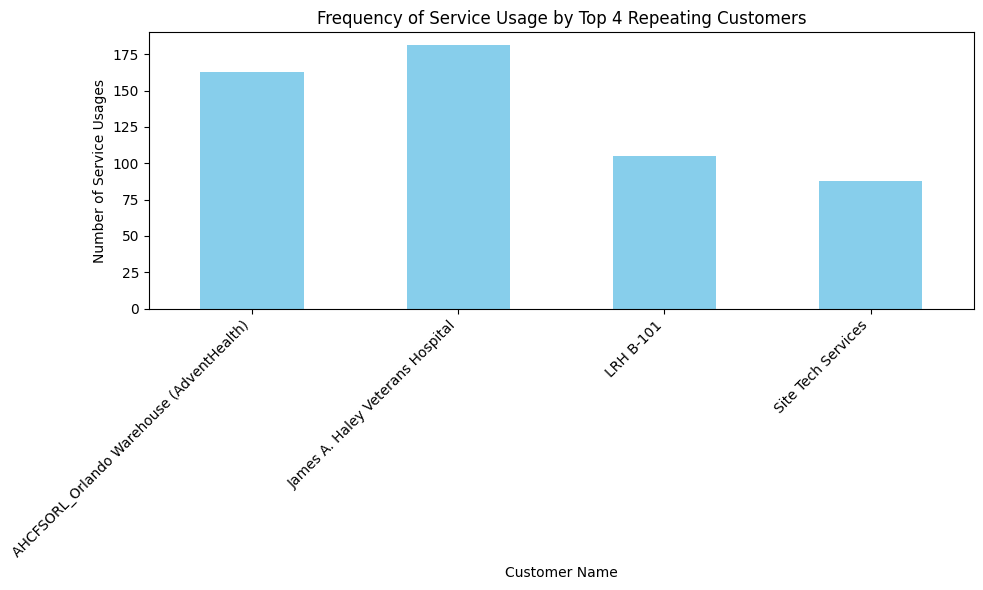

In [17]:
# Convert 'Pickup Date' to datetime if not already done
commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])

# Identify repeat customers
repeat_customers = commercial_df['Customer Name'].value_counts()[commercial_df['Customer Name'].value_counts() > 1]

# Get the top 4 repeating customers
top_4_customers = repeat_customers.head(4)

# Print the top 4 customers with repeat orders
print("Top 4 customers with the highest number of repeat orders:")
print(top_4_customers)

# Filter the DataFrame to include only the top 4 repeating customers
top_4_customers_df = commercial_df[commercial_df['Customer Name'].isin(top_4_customers.index)]

# Calculate frequency of service usage for the top 4 customers
service_usage_frequency = top_4_customers_df.groupby('Customer Name')['Pickup Date'].count()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
service_usage_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Service Usage by Top 4 Repeating Customers')
plt.xlabel('Customer Name')
plt.ylabel('Number of Service Usages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Frequency of Service Usage by Top 4 Repeating Customers Over time


<ipython-input-19-419e53de9038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])


Top 4 customers with the highest number of repeat orders:
Customer Name
James A. Haley Veterans Hospital             181
AHCFSORL_Orlando Warehouse (AdventHealth)    163
LRH B-101                                    105
Site Tech Services                            88
Name: count, dtype: int64


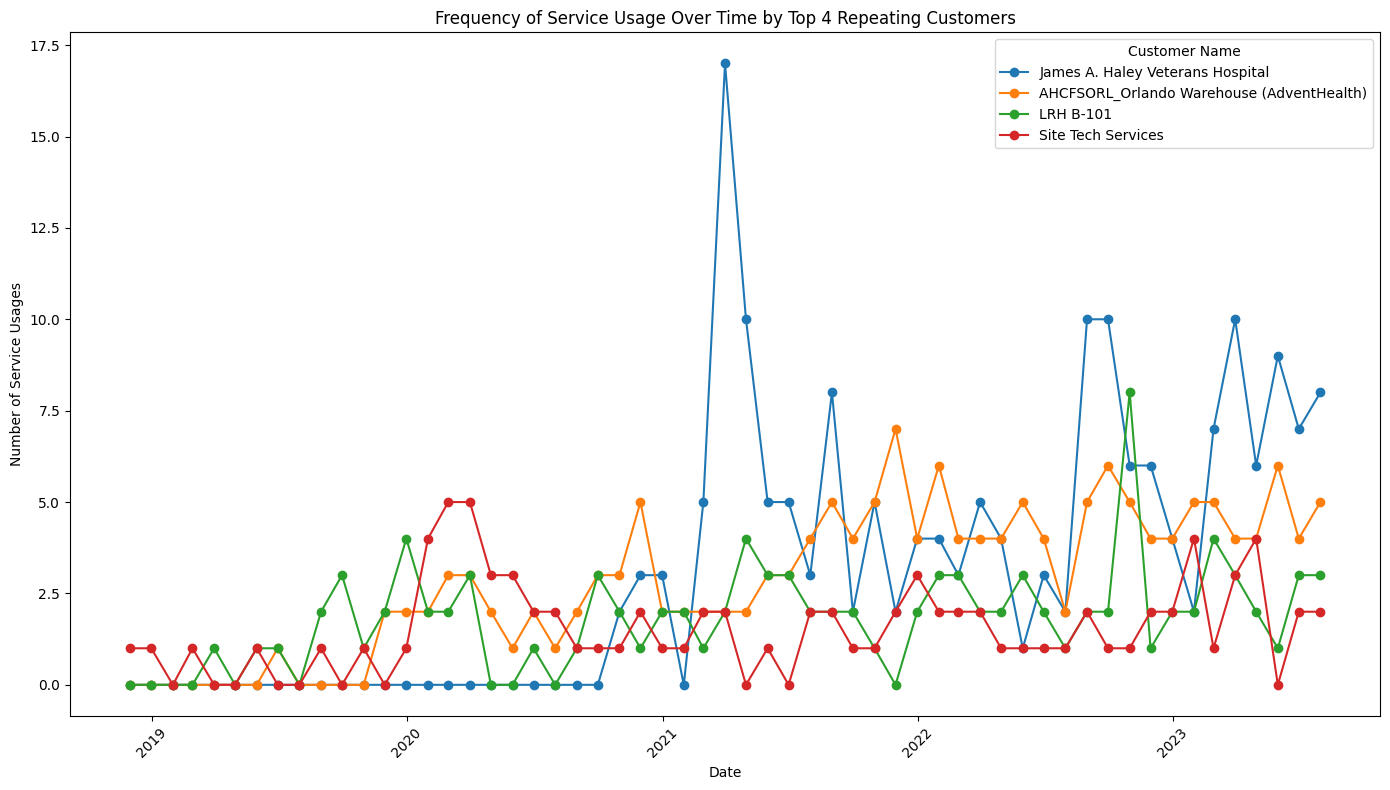

In [19]:
# Convert 'Pickup Date' to datetime if not already done
commercial_df['Pickup Date'] = pd.to_datetime(commercial_df['Pickup Date'])

# Identify repeat customers
repeat_customers = commercial_df['Customer Name'].value_counts()[commercial_df['Customer Name'].value_counts() > 1]

# Get the top 4 repeating customers
top_4_customers = repeat_customers.head(4)

# Print the top 4 customers with repeat orders
print("Top 4 customers with the highest number of repeat orders:")
print(top_4_customers)

# Filter the DataFrame to include only the top 4 repeating customers
top_4_customers_df = commercial_df[commercial_df['Customer Name'].isin(top_4_customers.index)]

# Set 'Pickup Date' as the index
top_4_customers_df.set_index('Pickup Date', inplace=True)

# Resample the data by month and count the number of occurrences
service_usage_over_time = top_4_customers_df.groupby('Customer Name').resample('M').size().unstack(0).fillna(0)

# Plotting the line chart
plt.figure(figsize=(14, 8))
for customer in top_4_customers.index:
    plt.plot(service_usage_over_time.index, service_usage_over_time[customer], marker='o', label=customer)

plt.title('Frequency of Service Usage Over Time by Top 4 Repeating Customers')
plt.xlabel('Date')
plt.ylabel('Number of Service Usages')
plt.legend(title='Customer Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top Locations with Expensive and Moderate Items for Residential Customers

In [ ]:
# Filter the DataFrame to include only Residential customers
residential_df = df_filtered[df_filtered['Job Category'] == 'RESIDENTIAL']

# Define categories for expensive and moderate items
expensive_items = ['xerox','battery','CPU','missle','LCD','Microwave','Scanner','harddrives','HDD','mac','Display','Dell','Batteries cables','speakers','phones modem']  # Example expensive items
moderate_items = ['Desktop', 'VCR/DVD', 'Electronics','Phones','Computers','Batter backups','Printers','Keyboards','Misc items','Monitors','Television','UPS','Notebook','Garmin','laptop','hard drive','copier']  # Example moderate items

# Function to categorize job descriptions
def categorize_job_description(description):
    if isinstance(description, str):  # Check if description is a string and not NaN
        if any(item in description for item in expensive_items):
            return 'Expensive'
        elif any(item in description for item in moderate_items):
            return 'Moderate'
    return 'Other'

# Apply categorization to job descriptions
residential_df['Item Category'] = residential_df['Job Description'].apply(categorize_job_description)

# Group by location and item category, and count occurrences
location_item_count = residential_df.groupby(['Address', 'Item Category']).size().reset_index(name='Count')

# Sort by count in descending order to get top locations
top_locations = location_item_count.sort_values(by='Count', ascending=False)

# Print the top locations with expensive and moderate items for Residential Customers
print("Top Locations with Expensive and Moderate Items for Residential Customers:")
print(top_locations)


Top Locations with Expensive and Moderate Items for Residential Customers:
                                                Address Item Category  Count
2281            2132 Ridgemore Drive, Valrico, FL 33594         Other      6
1927         1874 Greenhill Drive, Clearwater, FL 33755      Moderate      6
3489             3439 Baronne Ct, Clearwater, FL, 33761      Moderate      6
5552             6408 S MacDill Avenue, Tampa, FL 33611         Other      4
5092               5603 N Seminole Ave, Tampa, FL 33604         Other      4
...                                                 ...           ...    ...
2304            215 W Hiawatha Street, Tampa, FL, 33604      Moderate      1
2303  215 W Grand Central Ave. Apt 921, Tampa, Flori...     Expensive      1
2302        215 Star Shell Dr., APOLLO BEACH, FL, 33572     Expensive      1
2301    215 Star Shell Dr, Apollo Beach, Florida, 33572     Expensive      1
6790                           dropped off at OCB event         Other      1



<ipython-input-83-478e662ab99a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Item Category'] = residential_df['Job Description'].apply(categorize_job_description)


In [ ]:
# Create a map centered at the mean latitude and longitude of the locations
map_center = [residential_df['Latitude'].mean(), residential_df['Longitude'].mean()]

m = folium.Map(location=map_center, zoom_start=10)

# Generate heatmap data from the DataFrame
heatmap_data = residential_df[['Latitude', 'Longitude']].values.tolist()

# Add heatmap layer to the map
HeatMap(heatmap_data).add_to(m)

# Display the map
m.save('residential_heatmap.html')  # Save the map as an HTML file
m

Business Return Rate for Residential Customers

In [ ]:
# Total number of customers
total_customers = len(residential_df['Customer Name'].unique())

# Identify repeat customers
repeat_customers = residential_df['Customer Name'].value_counts()[residential_df['Customer Name'].value_counts() > 1].index

# Total number of repeat customers
total_repeat_customers = len(repeat_customers)

# Calculate business return rate
business_return_rate = total_repeat_customers / total_customers

print("Business Return Rate for Residential Customers:", business_return_rate)


Business Return Rate for Residential Customers: 0.09486229666612982


Top 20 cities with expensive and moderate items for residential customers

<ipython-input-65-95a87d297702>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Pickup Date'] = pd.to_datetime(residential_df['Pickup Date'])
<ipython-input-65-95a87d297702>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers_df['City'] = repeat_customers_df['Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)


Top cities with the highest number of repeat customers:
City
Tampa               484
Lakeland             88
Orlando              64
Sarasota             56
Riverview            44
Bradenton            41
Valrico              31
Clearwater           30
Lutz                 30
St Petersburg        30
Temple Terrace       27
Brandon              24
Land O Lakes         21
Wesley Chapel        18
Plant City           16
Odessa               14
Lithia               13
New Port Richey      11
Venice               11
Saint Petersburg      9
Name: count, dtype: int64


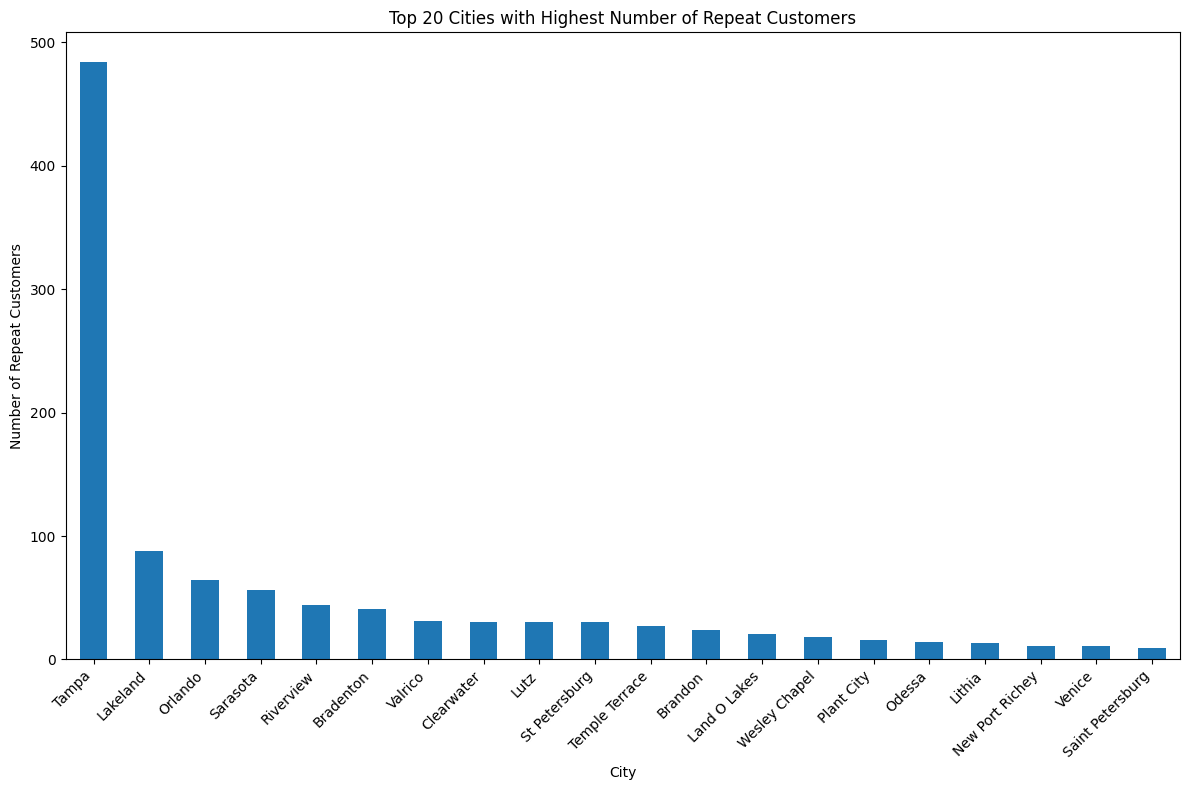

In [ ]:
# Convert 'Pickup Date' to datetime if not already done
residential_df['Pickup Date'] = pd.to_datetime(residential_df['Pickup Date'])

# Identify repeat customers
repeat_customers = residential_df['Customer Name'].value_counts()[residential_df['Customer Name'].value_counts() > 1].index

# Filter the DataFrame to include only repeat customers
repeat_customers_df = residential_df[residential_df['Customer Name'].isin(repeat_customers)]

# Extract the city from the address
repeat_customers_df['City'] = repeat_customers_df['Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else x)

# Count occurrences of repeat customers by city
top_cities = repeat_customers_df['City'].value_counts().head(20)

# Print the top cities with repeat customers
print("Top cities with the highest number of repeat customers:")
print(top_cities)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
top_cities.plot(kind='bar')
plt.title('Top 20 Cities with Highest Number of Repeat Customers')
plt.xlabel('City')
plt.ylabel('Number of Repeat Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top Repeating customers for residential Customers

<ipython-input-67-00ef48ccb75d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Pickup Date'] = pd.to_datetime(residential_df['Pickup Date'])


Top 4 customers with the highest number of repeat orders:
Customer Name
Leann Moore (RES)                               11
Leann Moore - A Stress-Less Transition (RES)    10
Josef Ackroyd (RES)                              9
Greg Hatch (RES)                                 9
Name: count, dtype: int64


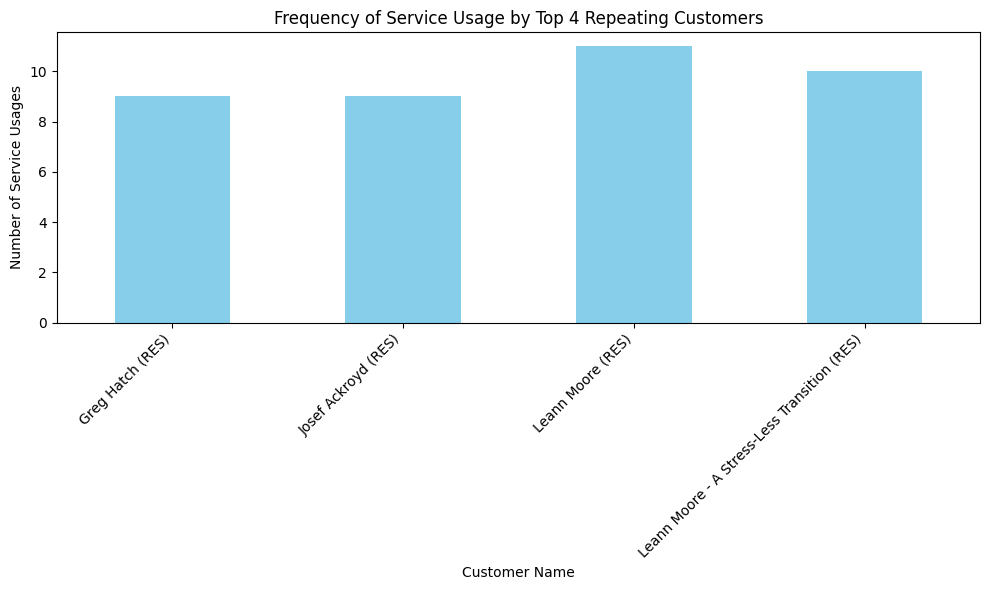

In [ ]:

# Assuming 'residential_df' is the DataFrame containing the residential customers dataset

# Convert 'Pickup Date' to datetime if not already done
residential_df['Pickup Date'] = pd.to_datetime(residential_df['Pickup Date'])

# Identify repeat customers
repeat_customers = residential_df['Customer Name'].value_counts()[residential_df['Customer Name'].value_counts() > 1]

# Get the top 4 repeating customers
top_4_customers = repeat_customers.head(4)

# Print the top 4 customers with repeat orders
print("Top 4 customers with the highest number of repeat orders:")
print(top_4_customers)

# Filter the DataFrame to include only the top 4 repeating customers
top_4_customers_df = residential_df[residential_df['Customer Name'].isin(top_4_customers.index)]

# Calculate frequency of service usage for the top 4 customers
service_usage_frequency = top_4_customers_df.groupby('Customer Name')['Pickup Date'].count()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
service_usage_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Service Usage by Top 4 Repeating Customers')
plt.xlabel('Customer Name')
plt.ylabel('Number of Service Usages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Frequency of Service Usage Over Time by Top 4 Repeating Customers for residential customers

<ipython-input-66-6da9bf2d1939>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Pickup Date'] = pd.to_datetime(residential_df['Pickup Date'])


Top 4 customers with the highest number of repeat orders:
Customer Name
Leann Moore (RES)                               11
Leann Moore - A Stress-Less Transition (RES)    10
Josef Ackroyd (RES)                              9
Greg Hatch (RES)                                 9
Name: count, dtype: int64


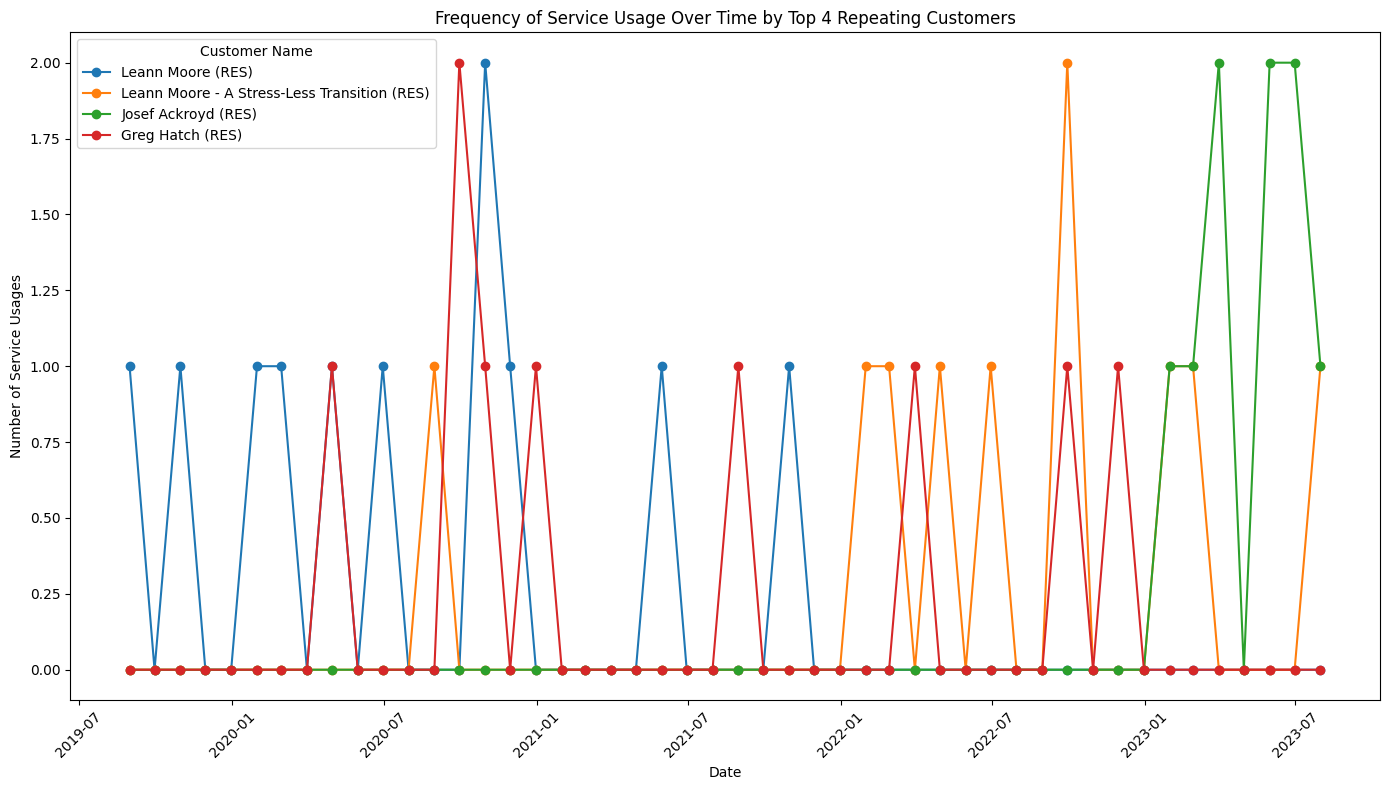

In [ ]:
# Convert 'Pickup Date' to datetime if not already done
residential_df['Pickup Date'] = pd.to_datetime(residential_df['Pickup Date'])

# Identify repeat customers
repeat_customers = residential_df['Customer Name'].value_counts()[residential_df['Customer Name'].value_counts() > 1]

# Get the top 4 repeating customers
top_4_customers = repeat_customers.head(4)

# Print the top 4 customers with repeat orders
print("Top 4 customers with the highest number of repeat orders:")
print(top_4_customers)

# Filter the DataFrame to include only the top 4 repeating customers
top_4_customers_df = residential_df[residential_df['Customer Name'].isin(top_4_customers.index)]

# Set 'Pickup Date' as the index
top_4_customers_df.set_index('Pickup Date', inplace=True)

# Resample the data by month and count the number of occurrences
service_usage_over_time = top_4_customers_df.groupby('Customer Name').resample('M').size().unstack(0).fillna(0)

# Plotting the line chart
plt.figure(figsize=(14, 8))
for customer in top_4_customers.index:
    plt.plot(service_usage_over_time.index, service_usage_over_time[customer], marker='o', label=customer)

plt.title('Frequency of Service Usage Over Time by Top 4 Repeating Customers')
plt.xlabel('Date')
plt.ylabel('Number of Service Usages')
plt.legend(title='Customer Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Forecasting

In [ ]:
df_filtered.head()

,Pickup Date,Customer Name,Customer Email,Customer Notes,Address,Latitude,Longitude,Contact Name,Contact Phone,Driver,Warehouse Location,Job Description,Job #,Job Category,Cluster,Color
0,10/2/2018 9:00,Emerge180,lchristopherson@emerge180.com,NaN,"13902 N Dale Mabry Hwy Suite 229, Tampa",28.072789,-82.507805,Lee Christopherson,NaN,Unassigned Jobs,NaN,18 CPU's,286,COMMERCIAL,0,blue
1,10/2/2018 10:00,Deliver Media,Mike.rumore@delivermedia.com,NaN,"3903 Northdale Blvd #280Tampa, Tampa, FL 33624",28.095117,-82.507505,Mike Rumore,8632791383,Unassigned Jobs,NaN,15 desktops,289,COMMERCIAL,0,blue
2,10/2/2018 10:30,Greatlakes Advisors,rcook@greatlakesadvisors.com,NaN,"7650 West Courtney Campbell, Tampa, FL",27.966524,-82.567540,Randy Cook,NaN,Unassigned Jobs,NaN,6 Desktops - 1 server - one monitor - external...,290,COMMERCIAL,0,blue
3,10/2/2018 9:00,TouchPoint Medical - Douglas,mmendez@touchpointmed.com,NaN,"114 Douglas Rd E\r\nOldsmar, FL 34677",28.041956,-82.663466,Jim Hill,NaN,Devin Edwards,NaN,Misc,291,COMMERCIAL,0,blue
4,10/2/2018 11:00,Disability Rights Florida,zoer@disabilityrightsflorida.org,NaN,"1000 N Ashley Dr., Suite 640\r\nTampa, FL",27.952094,-82.462287,Zoe Reeber,850-488-9071 ext 9763,Unassigned Jobs,NaN,Chairs; television; file cabinet,292,COMMERCIAL,0,blue


Data preprocessing for visualizations

In [ ]:
# Convert 'Pickup Date' to datetime
df_filtered['Pickup Date'] = pd.to_datetime(df_filtered['Pickup Date'])

# Extract year, month, day, day of week, and hour from 'Pickup Date'
df_filtered['Year'] = df_filtered['Pickup Date'].dt.year
df_filtered['Month'] = df_filtered['Pickup Date'].dt.month
df_filtered['Day'] = df_filtered['Pickup Date'].dt.day
df_filtered['Day of Week'] = df_filtered['Pickup Date'].dt.dayofweek
df_filtered['Hour'] = df_filtered['Pickup Date'].dt.hour

# Drop rows with missing values in essential columns
df_filtered = df_filtered.dropna(subset=['Pickup Date', 'Customer Name'])

# Display the first few rows of the DataFrame
df_filtered.head()


<ipython-input-71-695544cb8904>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Pickup Date'] = pd.to_datetime(df_filtered['Pickup Date'])
<ipython-input-71-695544cb8904>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Pickup Date'].dt.year
<ipython-input-71-695544cb8904>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,Pickup Date,Customer Name,Customer Email,Customer Notes,Address,Latitude,Longitude,Contact Name,Contact Phone,Driver,...,Job Description,Job #,Job Category,Cluster,Color,Year,Month,Day,Day of Week,Hour
0,2018-10-02 09:00:00,Emerge180,lchristopherson@emerge180.com,NaN,"13902 N Dale Mabry Hwy Suite 229, Tampa",28.072789,-82.507805,Lee Christopherson,NaN,Unassigned Jobs,...,18 CPU's,286,COMMERCIAL,0,blue,2018,10,2,1,9
1,2018-10-02 10:00:00,Deliver Media,Mike.rumore@delivermedia.com,NaN,"3903 Northdale Blvd #280Tampa, Tampa, FL 33624",28.095117,-82.507505,Mike Rumore,8632791383,Unassigned Jobs,...,15 desktops,289,COMMERCIAL,0,blue,2018,10,2,1,10
2,2018-10-02 10:30:00,Greatlakes Advisors,rcook@greatlakesadvisors.com,NaN,"7650 West Courtney Campbell, Tampa, FL",27.966524,-82.567540,Randy Cook,NaN,Unassigned Jobs,...,6 Desktops - 1 server - one monitor - external...,290,COMMERCIAL,0,blue,2018,10,2,1,10
3,2018-10-02 09:00:00,TouchPoint Medical - Douglas,mmendez@touchpointmed.com,NaN,"114 Douglas Rd E\r\nOldsmar, FL 34677",28.041956,-82.663466,Jim Hill,NaN,Devin Edwards,...,Misc,291,COMMERCIAL,0,blue,2018,10,2,1,9
4,2018-10-02 11:00:00,Disability Rights Florida,zoer@disabilityrightsflorida.org,NaN,"1000 N Ashley Dr., Suite 640\r\nTampa, FL",27.952094,-82.462287,Zoe Reeber,850-488-9071 ext 9763,Unassigned Jobs,...,Chairs; television; file cabinet,292,COMMERCIAL,0,blue,2018,10,2,1,11


Visualizing the pickups per year

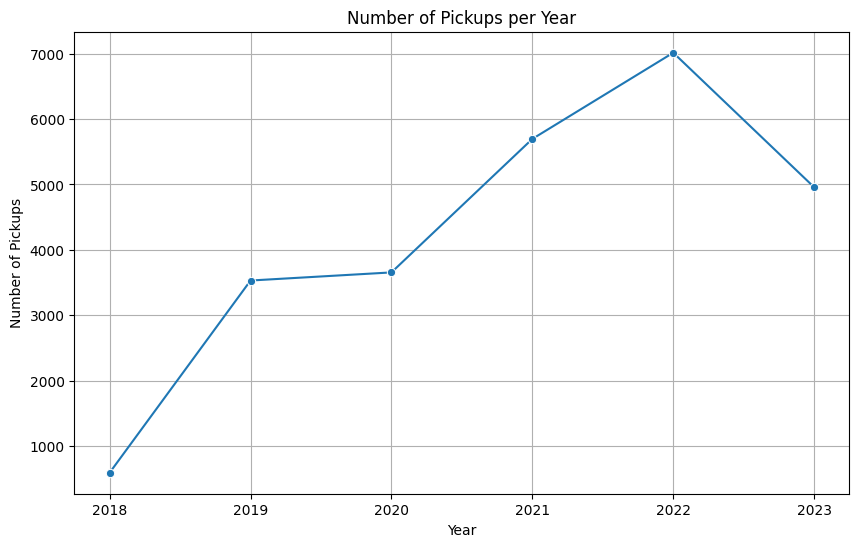

In [ ]:
# Number of pickups by year
yearly_pickups = df_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_pickups.index, y=yearly_pickups.values, marker='o')
plt.title('Number of Pickups per Year')
plt.xlabel('Year')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()


Visualizing pickups by month

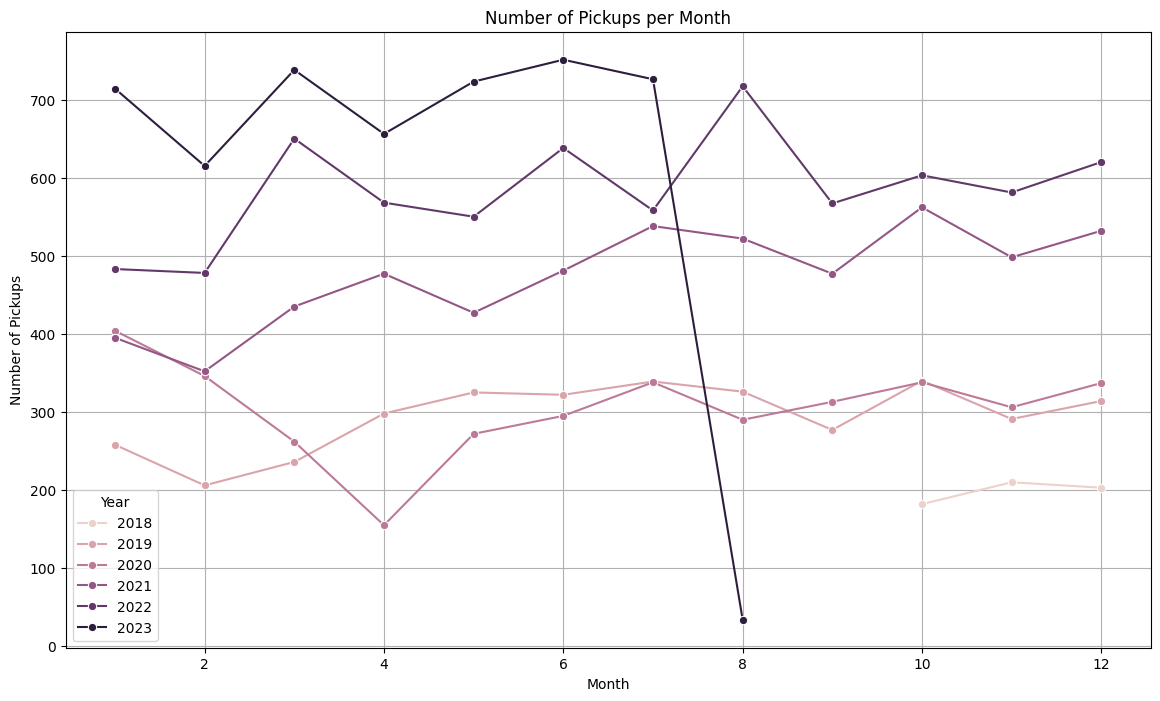

In [ ]:
# Number of pickups by month
monthly_pickups = df_filtered.groupby(['Year', 'Month']).size().reset_index(name='Pickups')

plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Pickups', hue='Year', data=monthly_pickups, marker='o')
plt.title('Number of Pickups per Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()


Visualizing pickups by week

<ipython-input-74-94f538b4e403>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_of_week_pickups.index, y=day_of_week_pickups.values, palette='viridis')


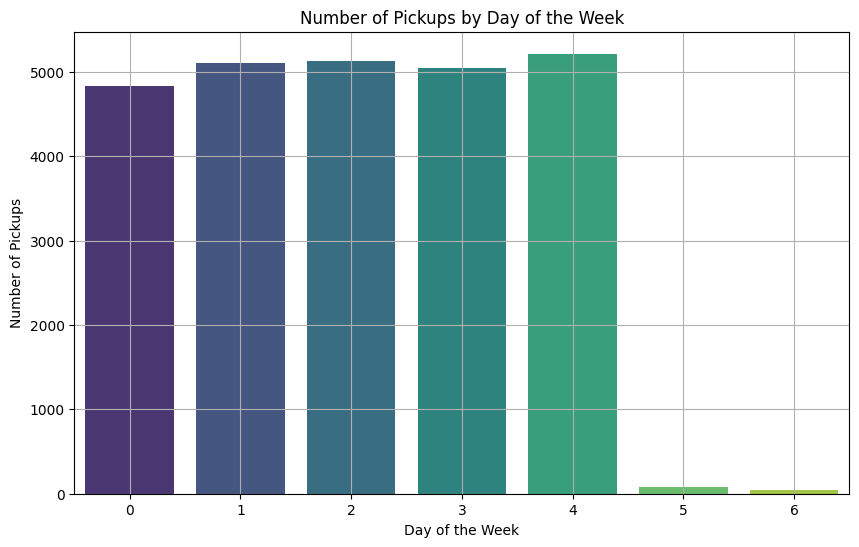

In [ ]:
# Number of pickups by day of the week
day_of_week_pickups = df_filtered['Day of Week'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_pickups.index, y=day_of_week_pickups.values, palette='viridis')
plt.title('Number of Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()


Forecasting Commercial Jobs and Residential Jobs Through ARIMA model

<ipython-input-81-5810381001a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pickup Date'] = pd.to_datetime(df['Pickup Date'])
<ipython-input-81-5810381001a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Pickup Date'].dt.month
<ipython-input-81-5810381001a5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

Mean Squared Error for Commercial Data: 1.5227933725567524
Mean Squared Error for Residential Data: 0.45782976938178543


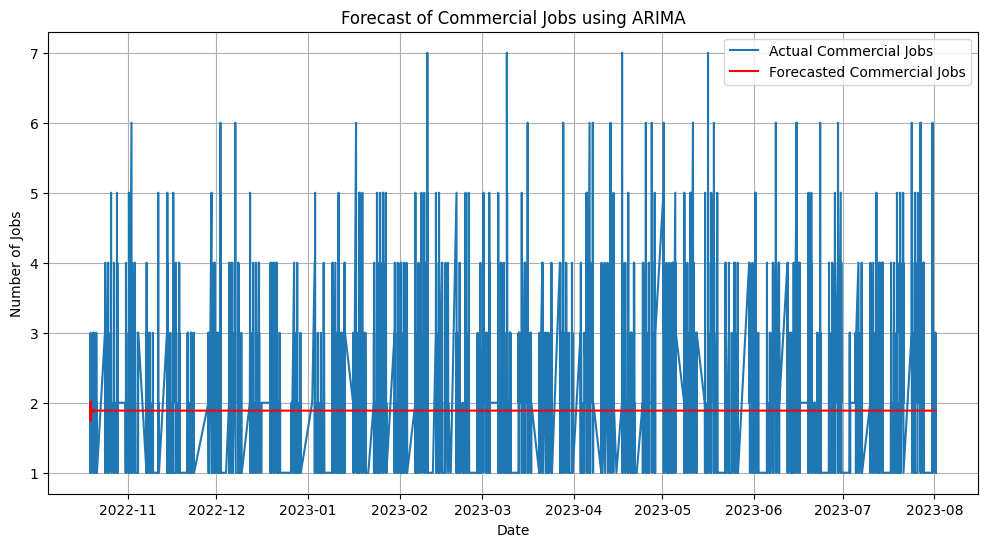

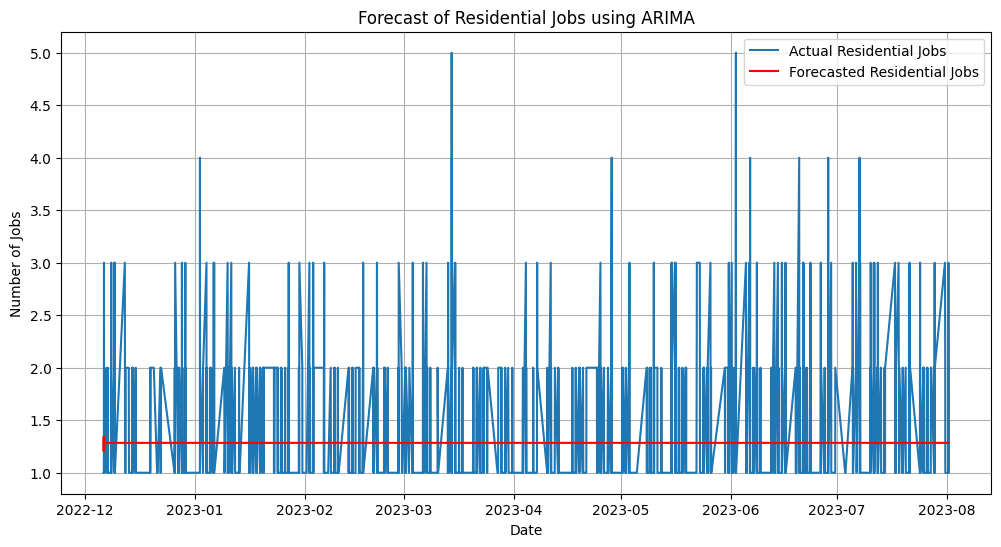

In [ ]:
# Function to preprocess data and convert 'Pickup Date' to datetime
def preprocess_data(df):
    df['Pickup Date'] = pd.to_datetime(df['Pickup Date'])
    df['Month'] = df['Pickup Date'].dt.month
    df['Year'] = df['Pickup Date'].dt.year
    df['Day'] = df['Pickup Date'].dt.day
    return df

# Function to fit ARIMA model and make predictions
def fit_arima(df):
    # Group by 'Pickup Date' and count number of jobs
    df_arima = df.groupby('Pickup Date').size().reset_index(name='Jobs')
    df_arima.set_index('Pickup Date', inplace=True)

    # Split data into train and test sets
    train_size = int(len(df_arima) * 0.8)
    train, test = df_arima[:train_size], df_arima[train_size:]

    # Fit ARIMA model
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()

    # Make predictions
    forecast = model_fit.forecast(steps=len(test))
    return test, forecast

# Preprocess data for commercial_df and residential_df
commercial_df = preprocess_data(commercial_df)
residential_df = preprocess_data(residential_df)

# Fit ARIMA model for commercial_df
test_commercial, forecast_commercial = fit_arima(commercial_df)

# Fit ARIMA model for residential_df
test_residential, forecast_residential = fit_arima(residential_df)

# Evaluate model performance
mse_commercial = mean_squared_error(test_commercial, forecast_commercial)
mse_residential = mean_squared_error(test_residential, forecast_residential)
print("Mean Squared Error for Commercial Data:", mse_commercial)
print("Mean Squared Error for Residential Data:", mse_residential)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test_commercial.index, test_commercial, label='Actual Commercial Jobs')
plt.plot(test_commercial.index, forecast_commercial, color='red', label='Forecasted Commercial Jobs')
plt.title('Forecast of Commercial Jobs using ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Jobs')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(test_residential.index, test_residential, label='Actual Residential Jobs')
plt.plot(test_residential.index, forecast_residential, color='red', label='Forecasted Residential Jobs')
plt.title('Forecast of Residential Jobs using ARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Jobs')
plt.legend()
plt.grid(True)
plt.show()
